In [4]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('salesData.csv')

In [14]:
df.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,PurchaseAddress
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,30,12,2019,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,29,12,2019,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,NaN,2019-12-12 18:21:00,12,12,2019,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,22,12,2019,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,18,12,2019,"43 Hill St, Atlanta, GA 30301"


 Renommer Day par Hours et PurchaseAddress par city

In [51]:
df.rename(columns={'Day':'Hours'})

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Hours,Month,Year,PurchaseAddress
0,295665.0,Macbook Pro Laptop,1.0,357.075,2019-12-30 00:01:00,30,12,2019,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,357.075,2019-12-29 07:03:00,29,12,2019,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,14.950,2019-12-12 18:21:00,12,12,2019,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990,2019-12-22 15:13:00,22,12,2019,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950,2019-12-18 12:38:00,18,12,2019,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...,...,...,...
185682,222905.0,AAA Batteries (4-pack),1.0,2.990,2019-06-07 19:02:00,7,6,2019,"795 Pine St, Boston, MA 02215"
185683,222906.0,27in FHD Monitor,1.0,149.990,2019-06-01 19:29:00,1,6,2019,"495 North St, New York City, NY 10001"
185684,222907.0,USB-C Charging Cable,1.0,11.950,2019-06-22 18:57:00,22,6,2019,"319 Ridge St, San Francisco, CA 94016"
185685,222908.0,USB-C Charging Cable,1.0,11.950,2019-06-26 18:35:00,26,6,2019,"916 Main St, San Francisco, CA 94016"


In [52]:
df.rename(columns={'PurchaseAddress':'city'})

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,city
0,295665.0,Macbook Pro Laptop,1.0,357.075,2019-12-30 00:01:00,30,12,2019,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,357.075,2019-12-29 07:03:00,29,12,2019,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,14.950,2019-12-12 18:21:00,12,12,2019,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990,2019-12-22 15:13:00,22,12,2019,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950,2019-12-18 12:38:00,18,12,2019,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...,...,...,...
185682,222905.0,AAA Batteries (4-pack),1.0,2.990,2019-06-07 19:02:00,7,6,2019,"795 Pine St, Boston, MA 02215"
185683,222906.0,27in FHD Monitor,1.0,149.990,2019-06-01 19:29:00,1,6,2019,"495 North St, New York City, NY 10001"
185684,222907.0,USB-C Charging Cable,1.0,11.950,2019-06-22 18:57:00,22,6,2019,"319 Ridge St, San Francisco, CA 94016"
185685,222908.0,USB-C Charging Cable,1.0,11.950,2019-06-26 18:35:00,26,6,2019,"916 Main St, San Francisco, CA 94016"


**verification des valeurs manquantes**

In [16]:
df.isna().sum().sort_values(ascending=False)[:10]

QuantityOrdered    15
PriceEach           6
OrderID             0
Product             0
OrderDate           0
Day                 0
Month               0
Year                0
PurchaseAddress     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185687 entries, 0 to 185686
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   OrderID          185687 non-null  float64
 1   Product          185687 non-null  object 
 2   QuantityOrdered  185672 non-null  float64
 3   PriceEach        185681 non-null  float64
 4   OrderDate        185687 non-null  object 
 5   Day              185687 non-null  int64  
 6   Month            185687 non-null  int64  
 7   Year             185687 non-null  int64  
 8   PurchaseAddress  185687 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.8+ MB


**Traitement des valeurs manquantes**

In [23]:
num_value =df.select_dtypes(include=['int64','float64']).columns
cal_value = df.select_dtypes(include=['object']).columns

In [24]:
for i in num_value:
  print(i)
  df[i].fillna(df[i].median(), inplace= True)

OrderID
QuantityOrdered
PriceEach
Day
Month
Year


In [25]:

for i in cal_value:
  print(i)
  df[i].fillna('none', inplace= True)

Product
OrderDate
PurchaseAddress


Vérification du remplement des valeurs manquantes

In [26]:

df.isnull().sum().sort_values(ascending=False)[:10]

OrderID            0
Product            0
QuantityOrdered    0
PriceEach          0
OrderDate          0
Day                0
Month              0
Year               0
PurchaseAddress    0
dtype: int64

**Traitement des valeurs aberants**

In [27]:
df.describe()

,OrderID,QuantityOrdered,PriceEach,Day,Month,Year
count,185687.000000,185687.000000,185687.000000,185687.000000,185687.000000,185687.000000
mean,230411.376227,1.124543,184.518391,15.758723,7.058679,2019.000183
std,51511.578477,0.443068,332.843150,8.782079,3.502942,0.013530
min,141234.000000,1.000000,2.990000,1.000000,1.000000,2019.000000
25%,185833.500000,1.000000,11.950000,8.000000,4.000000,2019.000000
50%,230355.000000,1.000000,14.950000,16.000000,7.000000,2019.000000
75%,275028.500000,1.000000,150.000000,23.000000,10.000000,2019.000000
max,319670.000000,9.000000,1700.000000,31.000000,12.000000,2020.000000


**verification des valeurs aberrantes**

<Axes: >

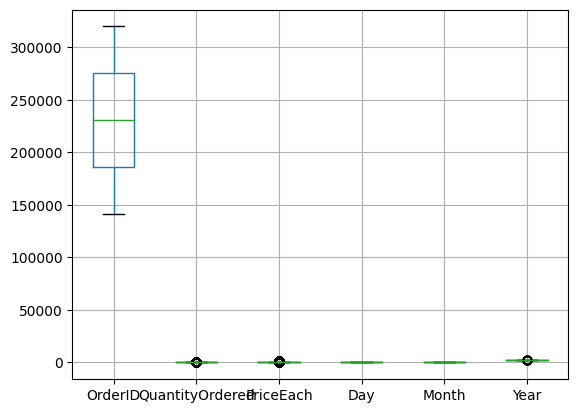

In [28]:
df.boxplot()

In [46]:
features = df[['QuantityOrdered','PriceEach','Year']]

In [47]:
features.head()

,QuantityOrdered,PriceEach,Year
0,1.0,357.075,2019
1,1.0,357.075,2019
2,1.0,14.950,2019
3,1.0,149.990,2019
4,1.0,11.950,2019


Algorithme pour remplacer les valeurs manquantes

In [33]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    df.loc[(df[feature] < lower_bound), feature] = lower_bound
    df.loc[(df[feature] > upper_bound), feature] = upper_bound

Process de remplacement de l'ensemble des valeurs aberrantes

In [49]:
for feature in features:
    impute_outliers(df, feature)

vérification du remplacement des valeurs aberrantes

<Axes: >

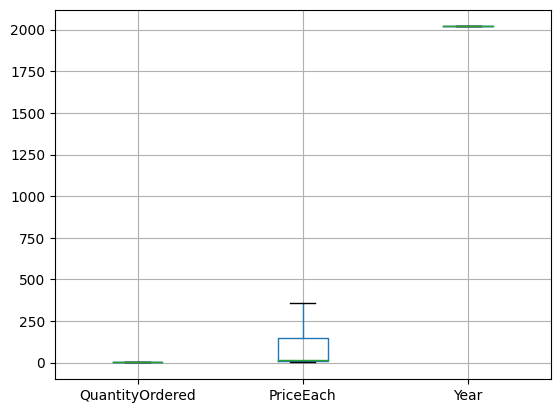

In [50]:
features.boxplot()

**Sauvegarde du fichier traité**

In [58]:
df.to_csv('sales_dataSet_corrige.csv', index = False)